>[Add OpenAI API Key](#scrollTo=QiY28IkttPC2)

>[Toy Example of Embedding and UMAP](#scrollTo=MMkemnK2C99i)

>[Read and Save Books from Website](#scrollTo=238AMWLU9lJ3)

>[Split and Load Book by Chapter](#scrollTo=mAJG9loJ0AkG)

>[Tokenization and Split Each Book Chapter by Chunk](#scrollTo=Dl9_DcQe98bk)

>>[Remove documents with low entropy](#scrollTo=2LkCsnFgBAXt)

>[Embedding Extraction](#scrollTo=nXl5b2E51boN)

>[UMAP Visualization](#scrollTo=zk94qYk9Sh57)

>>[Compare ISLR with D2L](#scrollTo=VKrzyzMMm_lv)

>>[Compare ISLR with ISLP](#scrollTo=kJhlsNnmm5rD)



In [1]:
!pip install langchain==0.0.179
!pip install pypdf
!pip install tiktoken
!pip install openai
!pip install pymupdf
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.7/907.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.0/271.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.7 MB/s eta 0:00:00


In [2]:
# https://stackoverflow.com/questions/58890109/line-wrapping-in-collaboratory-google-results
# print long texts in google colab
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [3]:
from tqdm import tqdm
import numpy as np
import seaborn as sns
import math
from datetime import datetime
from pytz import timezone
import pandas as pd
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt


from urllib.request import urlretrieve # download pdf from website

import tiktoken
import openai
import fitz # load table of contents
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import TokenTextSplitter
from langchain.embeddings import OpenAIEmbeddings

from nltk.probability import FreqDist
from gensim.parsing.preprocessing import remove_stopwords
import umap.umap_ as umap


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Add OpenAI API Key

In [ ]:
openai_api_key  = "fill your applied API here"

# Toy Example of Embedding, UMAP, Tokenizer

In [ ]:
words = ['apple', 'pear', 'desk', 'chair', 'dog', 'cat']
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key, chunk_size=1)
vectors = embeddings.embed_documents(words)

In [ ]:
n_neighbors=2
min_dist=0.1
n_components=2
metric='euclidean'

fit = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric,
    random_state=2
)

rd_res = fit.fit_transform(vectors) # dimension reduction result
df_rd_res = pd.DataFrame(rd_res, columns=['feature_1', 'feature_2'])
df_rd_res['category'] = ['fruit', 'fruit', 'furniture', 'furniture', 'animal', 'animal']

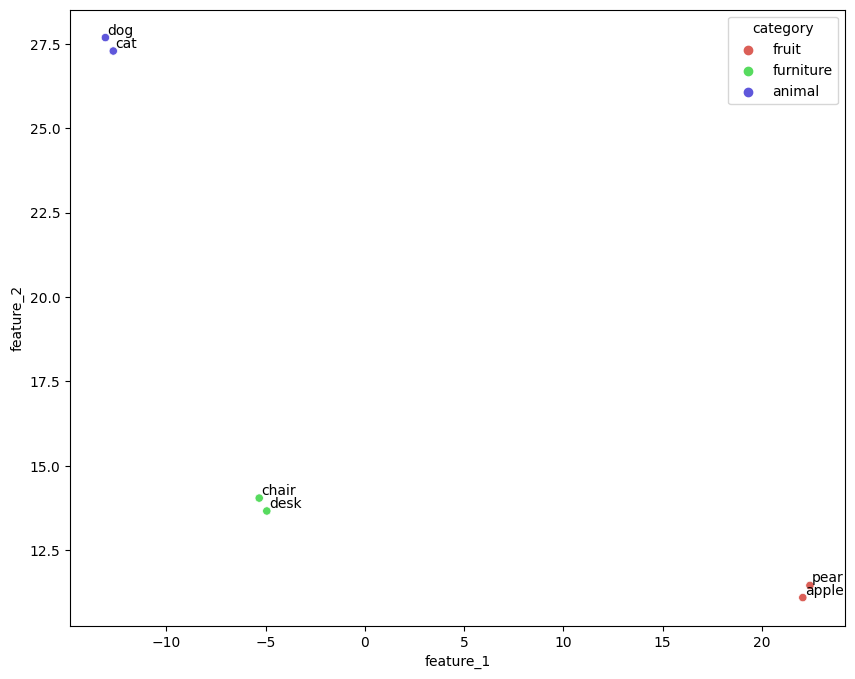

In [ ]:
plt.subplots(figsize=(10, 8))
ax = sns.scatterplot(x=df_rd_res.iloc[:, 0],
                     y=df_rd_res.iloc[:, 1],
                     hue=df_rd_res.category,
                     palette='hls'
                     )

for i, txt in enumerate(words):
  ax.annotate(txt, (rd_res[i, 0]+0.1, rd_res[i, 1]+0.1))

In [ ]:
# To get the tokeniser corresponding to a specific model in the OpenAI API:
enc = tiktoken.encoding_for_model("text-embedding-ada-002")
print(enc)

<Encoding 'cl100k_base'>


In [ ]:
enc.encode("An Introduction to Statistical Learning with Applications in R")

[2127, 29438, 311, 66794, 21579, 449, 32625, 304, 432]

In [ ]:
[enc.decode_single_token_bytes(token) for token in [2127, 29438, 311, 66794, 21579, 449, 32625, 304, 432]]

[b'An',
 b' Introduction',
 b' to',
 b' Statistical',
 b' Learning',
 b' with',
 b' Applications',
 b' in',
 b' R']

# Read and Save Books from Website
- ISLR: An Introduction to Statistical Learning: With Applications in R
- ISLP: An Introduction to Statistical Learning: With Applications in Python
- D2L: Dive into Deep Learning

- download An Introduction to Statistical Learning: With Applications in R

In [ ]:
download_url = 'https://hastie.su.domains/ISLR2/ISLRv2_website.pdf'
urlretrieve(download_url, 'ISLRv2_website.pdf')

('ISLRv2_website.pdf', <http.client.HTTPMessage at 0x78c30dfb2380>)

- download An Introduction to Statistical Learning: With Applications in Python

In [ ]:
download_url = 'https://hastie.su.domains/ISLP/ISLP_website.pdf'
urlretrieve(download_url, 'ISLP_website.pdf')

('ISLP_website.pdf', <http.client.HTTPMessage at 0x78c313f9f8e0>)

- download Dive into Deep Learning

In [ ]:
download_url = 'https://d2l.ai/d2l-en.pdf'
urlretrieve(download_url, 'd2l-en.pdf')

('d2l-en.pdf', <http.client.HTTPMessage at 0x78c30dfb25f0>)

# Split and Load Book by Chapter

In [ ]:
def split_and_load_book_chapters(book_path, book_name, start_chapter_id, end_chapter_id, remove_stop_words=True):
  """
  inputs:
  book_path: the location of the book pdf
  book_name: name of the book, such as ISLR, ISLP, or D2L
  start_chapter_id: the index of the start chapter, one may want to skip the Preface, etc.
  end_chapter_id: the index of the last chapter to keep
  remove_stop_words: whether to remove stop words such as the, a, an

  return:
  all_chapters_text: the text for each chapter
  all_chapters_metadata: meta data for each chapter including
    - book_name
    - chapter_id
    - start page of the chapter
    - end page of the chapter
    - chapter
  """
  book_pdf = fitz.open(book_path)
  # extract table of contents of the book
  toc = book_pdf.get_toc(simple=True) # https://pymupdf.readthedocs.io/en/latest/document.html#Document.get_toc
  # return level, title, page
  first_level_toc = [l for l in toc if l[0]==1]

  print("**********************************")
  print("loading Table of Contents...")
  print("**********************************")
  for i in range(len(first_level_toc)):
    print(f"Chapter {i}, {first_level_toc[i][1]}, {first_level_toc[i][2]}")

  print("**********************************")
  print("loading the book pages...")
  print("**********************************")
  loader = PyPDFLoader(book_path)
  pages = loader.load()
  print(f"The book has {len(pages)} pages")

  # extract pages
  all_chapters_text = []
  all_chapters_metadata = []

  for i in tqdm(range(start_chapter_id, end_chapter_id + 1)):
    print("**********************************")
    print(f"loading the page content for chapter index {i}...")
    text_chapter = ""
    page_start, page_end = first_level_toc[i][2], first_level_toc[i+1][2]
    for j in range(page_start, page_end):
      text_chapter += pages[j].page_content

    # remove stop words
    if remove_stop_words:
      text_chapter = remove_stopwords(text_chapter)

    all_chapters_text.append(text_chapter)

    chapter_name = first_level_toc[i][1]

    for index in range(len(chapter_name)):
      if chapter_name[index].isalpha(): # keep the chapter name from the first letter
        chapter_name_final = chapter_name[index:]
        print(f"formalizing chapter name as {chapter_name_final}")
        break

    dict_chapter_metadata = {
            "book_name": book_name,
            "chapter_id": i,
            "start_page": page_start,
            "end_page": page_end,
            "chapter": chapter_name_final
    }

    all_chapters_metadata.append(
      dict_chapter_metadata
    )

  return first_level_toc, all_chapters_text, all_chapters_metadata

In [ ]:
# chapter id 3 is Introduction, chapter id 23 is Recommender Systems
d2l_toc, d2l_chapters_text, d2l_chapters_metadata = split_and_load_book_chapters('d2l-en.pdf', 'd2l', start_chapter_id=3, end_chapter_id=23, remove_stop_words=True)

**********************************
loading Table of Contents...
**********************************
Chapter 0, Preface, 28
Chapter 1, Installation, 37
Chapter 2, Notation, 40
Chapter 3, Introduction, 43
Chapter 4, Preliminaries, 72
Chapter 5, Linear Neural Networks for Regression, 124
Chapter 6, Linear Neural Networks for Classification, 169
Chapter 7, Multilayer Perceptrons, 211
Chapter 8, Builders' Guide, 254
Chapter 9, Convolutional Neural Networks, 282
Chapter 10, Modern Convolutional Neural Networks, 318
Chapter 11, Recurrent Neural Networks, 377
Chapter 12, Modern Recurrent Neural Networks, 423
Chapter 13, Attention Mechanisms and Transformers, 466
Chapter 14, Optimization Algorithms, 527
Chapter 15, Computational Performance, 610
Chapter 16, Computer Vision, 657
Chapter 17, Natural Language Processing: Pretraining, 759
Chapter 18, Natural Language Processing: Applications, 815
Chapter 19, Reinforcement Learning, 854
Chapter 20, Gaussian Processes, 871
Chapter 21, Hyperparameter O

100%|██████████| 21/21 [00:00<00:00, 286.75it/s]

**********************************
loading the page content for chapter index 3...
formalizing chapter name as Introduction
**********************************
loading the page content for chapter index 4...
formalizing chapter name as Preliminaries
**********************************
loading the page content for chapter index 5...
formalizing chapter name as Linear Neural Networks for Regression
**********************************
loading the page content for chapter index 6...
formalizing chapter name as Linear Neural Networks for Classification
**********************************
loading the page content for chapter index 7...
formalizing chapter name as Multilayer Perceptrons
**********************************
loading the page content for chapter index 8...
formalizing chapter name as Builders' Guide
**********************************
loading the page content for chapter index 9...
formalizing chapter name as Convolutional Neural Networks
**********************************
loading the 

In [ ]:
# chapter id 2 is Introduction, and chapter id 14 is Multiple Testing
islr_toc, islr_chapters_text, islr_chapters_metadata = split_and_load_book_chapters('ISLRv2_website.pdf', 'islr', start_chapter_id=2, end_chapter_id=14, remove_stop_words=True)

**********************************
loading Table of Contents...
**********************************
Chapter 0, Preface, 3
Chapter 1, Contents, 5
Chapter 2, 1 Introduction, 12
Chapter 3, 2 Statistical Learning, 26
Chapter 4, 3 Linear Regression, 69
Chapter 5, 4 Classification, 139
Chapter 6, 5 Resampling Methods, 206
Chapter 7, 6 Linear Model Selection and Regularization, 233
Chapter 8, 7 Moving Beyond Linearity, 297
Chapter 9, 8 Tree-Based Methods, 335
Chapter 10, 9 Support Vector Machines, 374
Chapter 11, 10 Deep Learning, 410
Chapter 12, 11 Survival Analysis and Censored Data, 468
Chapter 13, 12 Unsupervised Learning, 503
Chapter 14, 13 Multiple Testing, 559
Chapter 15, Index, 602
**********************************
loading the book pages...
**********************************
The book has 612 pages


100%|██████████| 13/13 [00:00<00:00, 119.82it/s]

**********************************
loading the page content for chapter index 2...
formalizing chapter name as Introduction
**********************************
loading the page content for chapter index 3...
formalizing chapter name as Statistical Learning
**********************************
loading the page content for chapter index 4...
formalizing chapter name as Linear Regression
**********************************
loading the page content for chapter index 5...
formalizing chapter name as Classification
**********************************
loading the page content for chapter index 6...
formalizing chapter name as Resampling Methods
**********************************
loading the page content for chapter index 7...
formalizing chapter name as Linear Model Selection and Regularization
**********************************
loading the page content for chapter index 8...
formalizing chapter name as Moving Beyond Linearity
**********************************
loading the page content for chapter

In [ ]:
# chapter id 2 is Introduction, and chapter id 14 is Multiple Testing
islp_toc, islp_chapters_text, islp_chapters_metadata = split_and_load_book_chapters('ISLP_website.pdf', 'islp', start_chapter_id=2, end_chapter_id=14, remove_stop_words=True)

**********************************
loading Table of Contents...
**********************************
Chapter 0, Preface, 3
Chapter 1, Contents, 5
Chapter 2, 1 Introduction, 12
Chapter 3, 2 Statistical Learning, 25
Chapter 4, 3 Linear Regression, 78
Chapter 5, 4 Classification, 144
Chapter 6, 5 Resampling Methods, 209
Chapter 7, 6 Linear Model Selection and Regularization, 237
Chapter 8, 7 Moving Beyond Linearity, 297
Chapter 9, 8 Tree-Based Methods, 338
Chapter 10, 9 Support Vector Machines, 374
Chapter 11, 10 Deep Learning, 406
Chapter 12, 11 Survival Analysis and Censored Data, 475
Chapter 13, 12 Unsupervised Learning, 509
Chapter 14, 13 Multiple Testing, 563
Chapter 15, Index, 603
**********************************
loading the book pages...
**********************************
The book has 613 pages


100%|██████████| 13/13 [00:00<00:00, 173.77it/s]

**********************************
loading the page content for chapter index 2...
formalizing chapter name as Introduction
**********************************
loading the page content for chapter index 3...
formalizing chapter name as Statistical Learning
**********************************
loading the page content for chapter index 4...
formalizing chapter name as Linear Regression
**********************************
loading the page content for chapter index 5...
formalizing chapter name as Classification
**********************************
loading the page content for chapter index 6...
formalizing chapter name as Resampling Methods
**********************************
loading the page content for chapter index 7...
formalizing chapter name as Linear Model Selection and Regularization
**********************************
loading the page content for chapter index 8...
formalizing chapter name as Moving Beyond Linearity
**********************************
loading the page content for chapter

In [ ]:
all_chapters_text = d2l_chapters_text + islr_chapters_text + islp_chapters_text
all_chapters_metadata = d2l_chapters_metadata + islr_chapters_metadata + islp_chapters_metadata

# Tokenization and Split Each Book Chapter by Chunk

In [ ]:
def book_tokenization_split_chunk(chunk_size, all_chapters_text, all_chapters_metadata, tokenization_for_model='text-embedding-ada-002'):
  """
  inputs:
  chunk_size: the number of tokens each chunch should have at most
  all_chapters_text: the text for each chapter
  all_chapters_metadata: meta data for each chapter including
    - book_name
    - chapter_id
    - start page of the chapter
    - end page of the chapter
    - chapter
  tokenization_for_model: the name of the embedding model that is going to be used, tiktoken will choose the correct tokenizer for each corresponding embedding model

  outputs:
  docs: each doc object contains tokens with lengh of chunk_size, and the metadata such as book_name, chapter_id, start/end page, chapter name
  docs_entropy: records the entropy of the token distribution in each doc, we may want to remove docs with very low entropy
  """

  text_splitter = TokenTextSplitter(chunk_size=chunk_size,
                                    chunk_overlap=0,
                                    model_name=tokenization_for_model)

  docs = text_splitter.create_documents(all_chapters_text, all_chapters_metadata)

  print(f"all the chapters are further split into {len(docs)} docs")
  print(f"an example of doc:")
  print(docs[0])

  enc = tiktoken.encoding_for_model(tokenization_for_model)
  docs_entropy = []
  for i, d in enumerate(docs):
    encoded = enc.encode(d.page_content)
    num_tokens = len(encoded)

    # decode the token
    decoded = enc.decode_tokens_bytes(encoded)
    word_list = [byte.decode("ISO-8859-1") for byte in decoded]
    num_characters = sum(len(i) for i in word_list)

    print(f"Doc {i}: num of tokens is {num_tokens}, num of characters is {num_characters}")

    # calculate the most frequent token in each doc
    fdist = FreqDist()
    for t in word_list:
      fdist[t] += 1

    print(f"Top five most frequent bytes are {fdist.most_common(5)}")

    # Calculate the probability distribution
    word_probs = {word: count / num_tokens for word, count in fdist.items()}

    # Calculate the entropy
    entropy = -sum(prob * math.log2(prob) for prob in word_probs.values())

    docs_entropy.append(entropy)

    print(f"Entropy is {entropy} \n")


  return docs, docs_entropy


In [ ]:
chunk_size=2000 # this can be a parameter to play with
docs, docs_entropy = book_tokenization_split_chunk(chunk_size, all_chapters_text, all_chapters_metadata)

all the chapters are further split into 535 docs
an example of doc:
page_content='2 Introduction Fortheseproblems,eveneliteprogrammerswouldstruggletocodeupsolutionsfromscratch. Thereasonscanvary.Sometimestheprogramthatwearelookingforfollowsapatternthat changes time, ﬁxed right answer! In cases, successful solution adapt gracefully changing world. At times, relationship (say pixels, abstract categories) complicated, requiring thousands millions computationsandfollowingunknownprinciples.Inthecaseofimagerecognition,theprecise stepsrequiredtoperformthetaskliebeyondourconsciousunderstanding,eventhoughour subconsciouscognitiveprocessesexecutethetaskeﬀortlessly. Machine learning study algorithms learn experience. As machine learningalgorithmaccumulatesmoreexperience,typicallyintheformofobservationaldata orinteractionswithanenvironment,itsperformanceimproves.Contrastthiswithourdeter- ministice-commerceplatform,whichfollowsthesamebusinesslogic,nomatterhowmuch experienceaccrues,untilthedeveloper

## Remove documents with low entropy



In [ ]:
stats = boxplot_stats(docs_entropy)

In [ ]:
stats

[{'mean': 8.173676712614244,
  'iqr': 0.7125196672009864,
  'cilo': 8.288978715549288,
  'cihi': 8.385706137644853,
  'whishi': 9.468753867677432,
  'whislo': 6.985045009854733,
  'fliers': array([6.20543179, 6.8857454 , 6.77010912, 6.54458054, 6.76361956,
         3.49922755, 6.7837662 , 2.24403383, 2.23167258, 2.40596896,
         2.23501017, 3.56715359, 6.18720205, 4.64533764, 2.58703733,
         4.27922617, 5.96190165, 6.16816721, 6.51810111, 6.63301147,
         6.6120637 , 6.71842767, 2.08875048, 2.23484794, 2.07282858,
         5.96811384, 6.23931076, 4.33767611, 2.58303635, 5.08768215,
         5.80361416, 5.79958167, 4.3216625 , 5.38451713]),
  'q1': 8.002646374412736,
  'med': 8.33734242659707,
  'q3': 8.715166041613722}]

Text(0.5, 0, 'Entropy Boxplot of Splitted Docs')

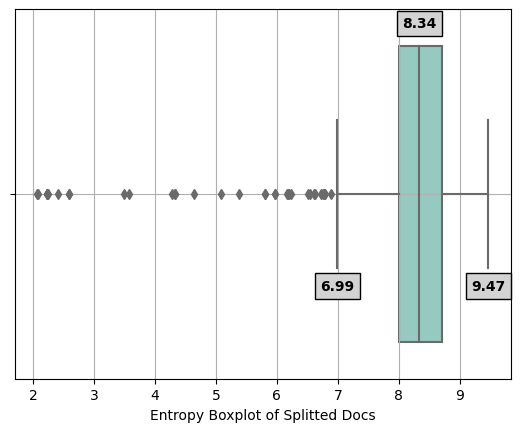

In [ ]:
box_plot = sns.boxplot(x=docs_entropy, palette='Set3')

for k in ['whislo', 'whishi']:
    x = round(stats[0][k], 2)
    box_plot.text(x, 0.26, x, horizontalalignment='center', size='medium', color='k', weight='semibold', bbox=dict(facecolor='lightgray'))

for k in ['med']:
    x = round(stats[0][k], 2)
    box_plot.text(x, -0.45, x, horizontalalignment='center', size='medium', color='k', weight='semibold', bbox=dict(facecolor='lightgray'))

plt.grid(True)
plt.xlabel('Entropy Boxplot of Splitted Docs')

In [ ]:
# from Wiki: the lower whisker boundary of the box plot is the smallest data value that is within 1.5 IQR below the first quartile
# https://en.wikipedia.org/wiki/Box_plot
index_docs_low_info = [i for i, e in enumerate(docs_entropy) if e < stats[0]['whislo']]

In [ ]:
index_docs_low_info

[64,
 113,
 221,
 226,
 227,
 247,
 265,
 266,
 267,
 268,
 269,
 270,
 287,
 288,
 289,
 311,
 312,
 315,
 331,
 362,
 386,
 417,
 418,
 419,
 420,
 421,
 437,
 438,
 439,
 459,
 460,
 462,
 489,
 511]

In [ ]:
for i in index_docs_low_info:
  print(i)
  print(docs[i].page_content)

64
al networks. These include convolutional layers themselves, nitty-gritty details including padding stride, pooling layers aggregate information adja- cent spatial regions, use multiple channels layer, careful discussion thestructureofmodernarchitectures.Wewillconcludethechapterwithafullworkingex- ample LeNet, ﬁrst convolutional network successfully deployed, long rise ofmoderndeeplearning.Inthenextchapter,wewilldiveintofullimplementationsofsome 240
113
cognition,object detection, semantic segmentation, superresolution ( Dosovitskiy et al., 2021,Liuet al., 2021).Transformersalsoshowedupascompetitivemethodsforspeechrecognition( Gulati etal.,2020),reinforcementlearning( Chenetal.,2021),andgraphneuralnetworks( Dwivedi andBresson,2020 ). ThecoreideabehindtheTransformermodelisthe attention mechanism ,aninnovationthat wasoriginallyenvisionedasanenhancementforencoder-decoderRNNsappliedtosequence- to-sequenceapplications,likemachinetranslations( Bahdanau etal.,2014).Youmightrecall thatintheﬁ

In [ ]:
print(f"Before remvoing low information docs, the book is split up to {len(docs)} documents")
docs = [docs[i] for i, d in enumerate(docs) if i not in index_docs_low_info]
print(f"After remvoing low information docs, the book is split up to {len(docs)} documents")

Before remvoing low information docs, the book is split up to 535 documents
After remvoing low information docs, the book is split up to 501 documents


# Embedding Extraction

In [ ]:
embedding_model = OpenAIEmbeddings(openai_api_key=openai_api_key)

In [ ]:
print(embedding_model.model)

text-embedding-ada-002


In [ ]:
# apply text-embedding-ada-002 to extract embeddings for each chunk
embeddings = embedding_model.embed_documents([x.page_content for x in docs])

In [ ]:

tz = timezone('EST')
filestr = datetime.now(tz).strftime("%Y_%m_%d-%I_%M_%S_%p")

In [ ]:
# save the embeddings for future use instead of calling openAI
df_embeddings = pd.DataFrame(embeddings)

print(df_embeddings.shape)

df_embeddings.to_csv(f"/content/drive/MyDrive/book_embeddings_{filestr}.csv", index = False)

(501, 1536)


In [ ]:
df_embedding_metadata = pd.DataFrame()
df_embedding_metadata['chapter_name'] = [n.metadata['chapter'] for n in docs]
df_embedding_metadata['chapter_id'] = [str(n.metadata['chapter_id']) for n in docs]
df_embedding_metadata['book_name'] = [n.metadata['book_name'] for n in docs]
df_embedding_metadata['start_page'] = [n.metadata['start_page'] for n in docs]
df_embedding_metadata['end_page'] = [n.metadata['end_page'] for n in docs]
df_embedding_metadata['page_content'] = [n.page_content for n in docs]
df_embedding_metadata['book_chapter'] = df_embedding_metadata['book_name'] + "__" + df_embedding_metadata['chapter_id'] + "__" + df_embedding_metadata['chapter_name']

In [ ]:
df_embedding_metadata.to_csv(f"/content/drive/MyDrive/book_embeddings_metadata_{filestr}.csv", index = False, escapechar='\\')

In [ ]:
filestr

'2023_08_06-09_24_31_PM'

# UMAP Visualization

In [ ]:
df_embeddings = pd.read_csv(f"/content/drive/MyDrive/book_embeddings_{filestr}.csv") # d2l, islr, islp 3 books
df_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,-0.006886,0.012036,0.019411,-0.026355,0.005806,0.012200,0.015337,0.004593,-0.042020,-0.041719,...,-0.004795,0.017647,0.019848,-0.017839,-0.027435,-0.041391,0.011715,-0.001199,-0.021037,-0.014490
1,-0.015697,0.002845,0.027070,-0.011642,-0.008454,0.012668,0.018726,0.007091,-0.033569,-0.037975,...,-0.003618,0.005160,0.017886,-0.017597,-0.033789,-0.033266,0.017225,0.004709,-0.028530,-0.006967
2,0.000260,0.012125,0.007969,-0.012896,-0.002653,-0.007381,0.005897,0.008867,-0.022723,-0.048500,...,0.001489,0.011084,0.006907,0.005505,-0.025142,-0.025129,-0.007475,-0.016018,-0.039606,-0.017316
3,-0.017073,0.007896,0.011810,-0.038871,0.010217,0.008388,-0.015467,-0.005456,-0.030854,-0.048885,...,-0.010460,0.021811,0.011202,-0.018760,-0.028370,-0.017127,-0.000390,-0.001524,-0.017951,-0.007842
4,-0.017836,-0.011783,0.015958,-0.021017,-0.003726,0.027406,0.009076,0.002759,-0.040224,-0.041979,...,-0.015423,0.021264,0.017041,-0.018138,-0.045873,-0.023773,0.016575,-0.005295,-0.026994,-0.014793


In [ ]:
df_embedding_metadata = pd.read_csv(f"/content/drive/MyDrive/book_embeddings_metadata_{filestr}.csv")
df_embedding_metadata.head()

,chapter_name,chapter_id,book_name,start_page,end_page,page_content,book_chapter
0,Introduction,3,d2l,43,72,"2 Introduction Fortheseproblems,eveneliteprogr...",d2l__3__Introduction
1,Introduction,3,d2l,43,72,"inputscanbeconvenient, givingusonelesscomplica...",d2l__3__Introduction
2,Introduction,3,d2l,43,72,"18a table, row corresponds diﬀerent house, col...",d2l__3__Introduction
3,Introduction,3,d2l,43,72,"“programminglanguages”,“Linux”,“cloudcomputing...",d2l__3__Introduction
4,Introduction,3,d2l,43,72,"plantobeadatascientist,youhadbettergetused toi...",d2l__3__Introduction


In [ ]:
def compare_two_books_in_embeddings(df_embeddings, df_embedding_metadata, book_name1, book_name2):
  """
  df_embeddings: embeddings from openai embedding model
  df_embedding_metadata: chapter_name, chapter_id, book_name, start_page, end_page, page_content, book_chapter
  book_name1: example-islr
  book_name2: example-islp
  """

  n_neighbors = 15
  min_dist = 0.1
  n_components = 2
  metric='euclidean'

  fit = umap.UMAP(
      n_neighbors=n_neighbors,
      min_dist=min_dist,
      n_components=n_components,
      metric=metric,
      random_state=2
  )

  sel = df_embedding_metadata['book_name'].isin([book_name1, book_name2])
  df_embeddings_filtered = df_embeddings.loc[sel, :]

  df_book_embedding_umap = df_embedding_metadata.loc[sel, :]

  rd_res = fit.fit_transform(df_embeddings_filtered) # dimension reduction result

  df_rd_res = pd.DataFrame(rd_res, columns=['feature_1', 'feature_2'])
  df_rd_res['chapter_name'] = df_book_embedding_umap['chapter_name'].values # [n.metadata['chapter'] for n in docs]
  df_rd_res['chapter_id'] = df_book_embedding_umap['chapter_id'].values # [str(n.metadata['chapter_id']) for n in docs]
  df_rd_res['book_name'] = df_book_embedding_umap['book_name'].values # [n.metadata['book_name'] for n in docs]
  df_rd_res['page_content'] = df_book_embedding_umap['page_content'].values # [n.page_content[:200] for n in docs]
  df_rd_res['book_chapter'] = df_book_embedding_umap['book_chapter'].values # df_book_embedding_umap['book_name'] + "__" + df_book_embedding_umap['chapter_id'] + "__" + df_book_embedding_umap['chapter_name']

  # df_rd_res = df_book_embedding_umap.loc[sel, :]
  plt.subplots(figsize=(15,12))

  colors = [
      '#FF0000',
      '#00CDF9',
      '##E15B86'
  ]
  for i, book_name in enumerate(df_rd_res['book_name'].unique()):
    rd_res_book = df_rd_res.loc[df_rd_res['book_name'] == book_name, :]
    for chapter in rd_res_book['book_chapter'].unique():
      rd_res_chapter = rd_res_book.loc[rd_res_book['book_chapter'] == chapter]
      plt.scatter(
          x = rd_res_chapter['feature_1'],
          y = rd_res_chapter['feature_2'],
          color = colors[i], # the chapters from the same book share the same color,
          s = 10,
          label = chapter
      )

  plt.xlabel('feature_1', fontsize=15)
  plt.ylabel('feature_2', fontsize=15)

  plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
  plt.title(f"Compare {book_name1} with {book_name2}", fontsize = 15)

  for i, row in df_rd_res.iterrows():
    plt.annotate(row['chapter_id'],
                (row['feature_1'], row['feature_2']),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                size = 11
                )


## Compare ISLR with D2L

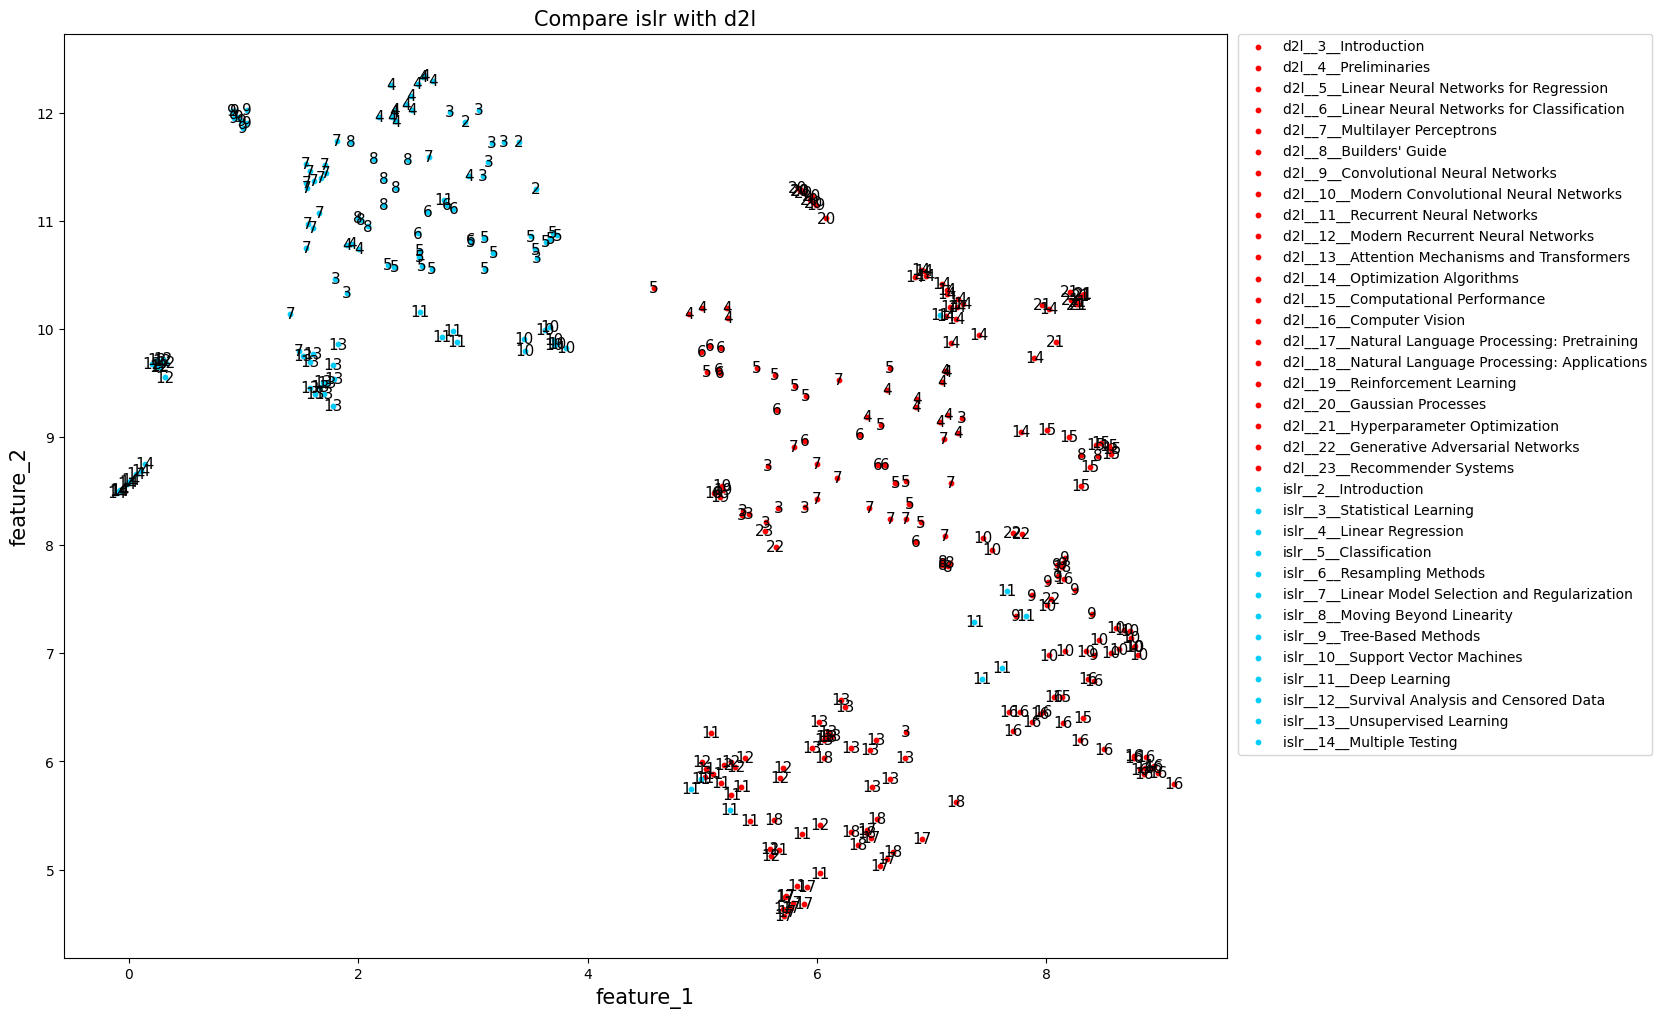

In [ ]:
compare_two_books_in_embeddings(df_embeddings, df_embedding_metadata, 'islr', 'd2l')

## Compare ISLR with ISLP

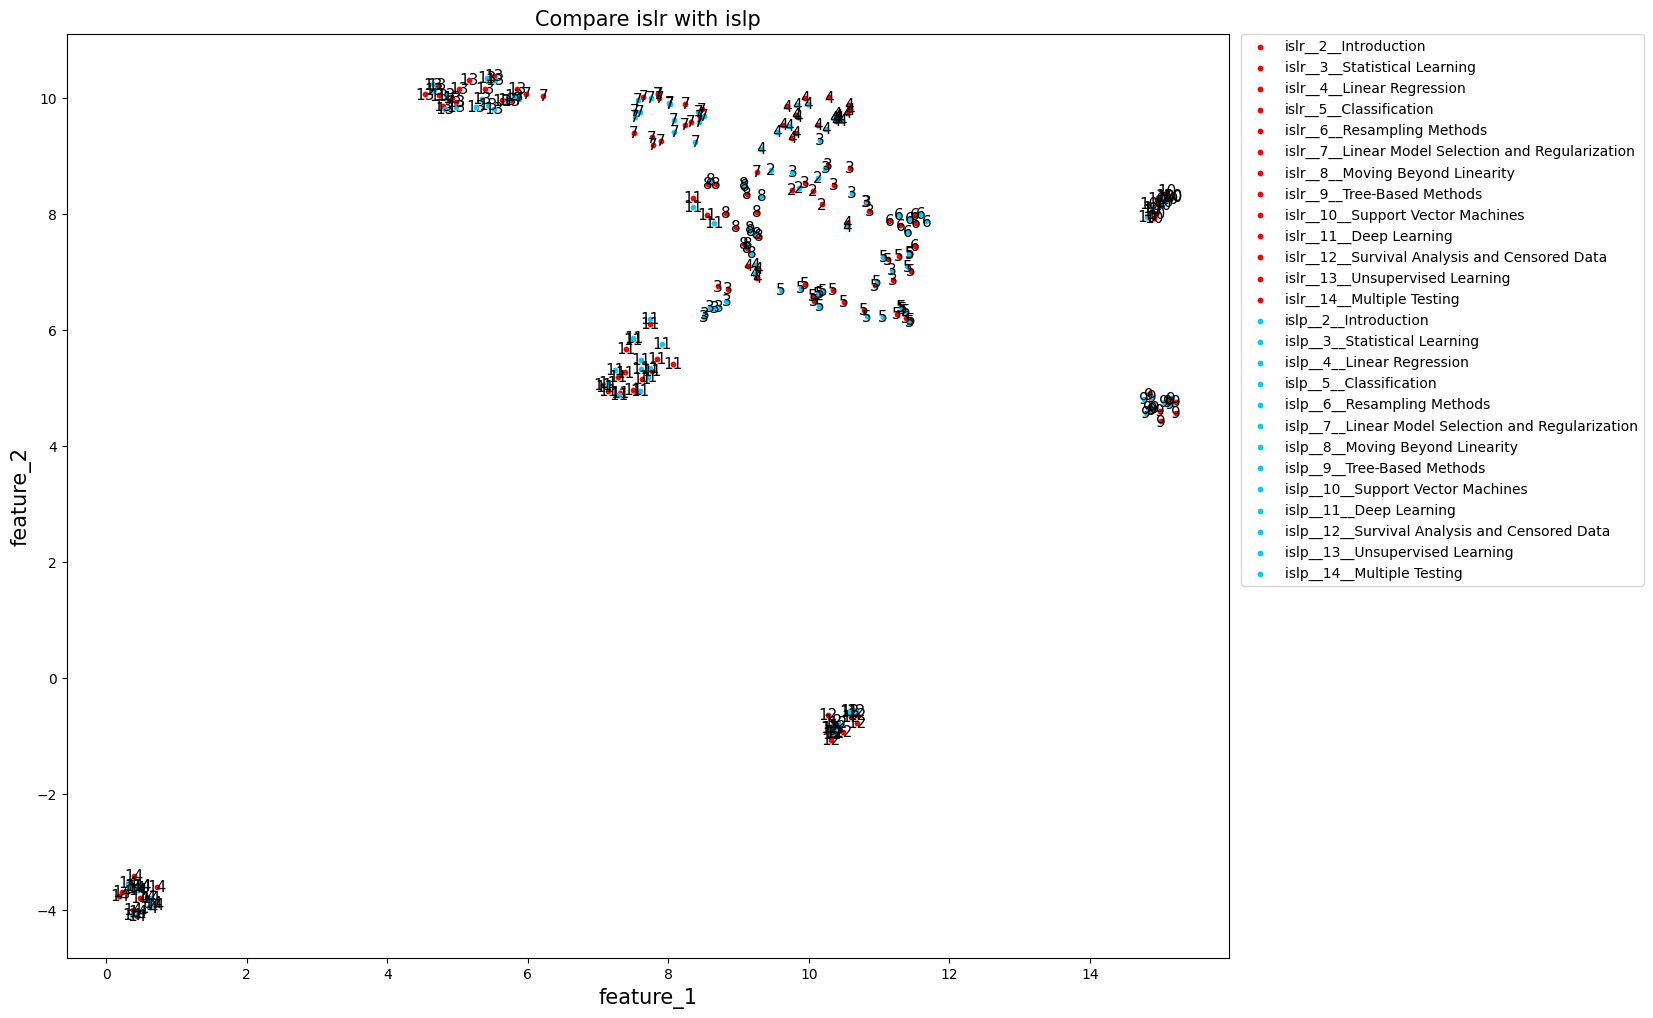

In [ ]:
compare_two_books_in_embeddings(df_embeddings, df_embedding_metadata, 'islr', 'islp')